In [2]:
### importamos las librerias
import numpy as np
import pandas as pd #### extiende pandas
import matplotlib.pyplot as plt
import seaborn as sb #### extiende sobre seaborn
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearning_Platzi')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar la data

In [4]:
## Cargar un pandas dataframe de una base de datos
movies = pd.read_csv('https://query.data.world/s/gnpexslsce4wp424w2kg4d6rkyxw2l')
movies = movies[['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration', 'language', 'country', # duration.1
'genres', 'content_rating', 'plot_keywords', 'director_name', 'actor_1_name',  'actor_2_name', 'actor_3_name',
'cast_total_facebook_likes', 'budget', 'imdb_score', 'gross']].copy()
movies['movie_title'] = movies['movie_title'].apply(lambda x: x.replace('\xa0',''))
movies

,movie_title,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Color,NaN,87.0,English,Canada,Comedy|Drama,NaN,fraud|postal worker|prison|theft|trial,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,2283,NaN,7.7,NaN
5039,The Following,NaN,Color,16.00,43.0,English,USA,Crime|Drama|Mystery|Thriller,TV-14,cult|fbi|hideout|prison escape|serial killer,NaN,Natalie Zea,Valorie Curry,Sam Underwood,1753,NaN,7.5,NaN
5040,A Plague So Pleasant,2013.0,Color,NaN,76.0,English,USA,Drama|Horror|Thriller,NaN,NaN,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,0,1400.0,6.3,NaN
5041,Shanghai Calling,2012.0,Color,2.35,100.0,English,USA,Comedy|Drama|Romance,PG-13,NaN,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,2386,NaN,6.3,10443.0


In [110]:
### ver la dimension del Dataframe
movies.shape

(5043, 18)

In [111]:
### visualizar columnas
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'genres', 'content_rating', 'plot_keywords',
       'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'cast_total_facebook_likes', 'budget', 'imdb_score', 'gross'],
      dtype='object')

In [112]:
## visualizar los index
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [113]:
### extraer colunma del dataframe
columna1 = movies['movie_title']
columna1

0                                                  Avatar
1                Pirates of the Caribbean: At World's End
2                                                 Spectre
3                                   The Dark Knight Rises
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                              Signed Sealed Delivered
5039                            The Following            
5040                                 A Plague So Pleasant
5041                                     Shanghai Calling
5042                                    My Date with Drew
Name: movie_title, Length: 5043, dtype: object

In [114]:
#### acceder a la linea 10 del dataframe
movies.loc[10,:]

movie_title                                 Batman v Superman: Dawn of Justice
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                                      Henry Cavill
actor_2_name                                        

In [115]:
### forma de acceder a columnas
movies['movie_title']
movies.loc[:,'movie_title']

0                                                  Avatar
1                Pirates of the Caribbean: At World's End
2                                                 Spectre
3                                   The Dark Knight Rises
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                              Signed Sealed Delivered
5039                            The Following            
5040                                 A Plague So Pleasant
5041                                     Shanghai Calling
5042                                    My Date with Drew
Name: movie_title, Length: 5043, dtype: object

## Inspeccionar datos y entenderlos mejor


In [8]:
### informacion general del df
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   genres                     5043 non-null   object 
 8   content_rating             4740 non-null   object 
 9   plot_keywords              4890 non-null   object 
 10  director_name              4939 non-null   object 
 11  actor_1_name               5036 non-null   object 
 12  actor_2_name               5030 non-null   object 
 13  actor_3_name               5020 non-null   objec

In [9]:
### separar las columnas categoricas y numericas
type(movies.dtypes)

pandas.core.series.Series

In [10]:
movies.dtypes == "float64"

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [11]:
movies.dtypes == 'int64'

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [12]:
num = (movies.dtypes == "float64") | (movies.dtypes == 'int64')
num

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [13]:
num_cols = [c for c in num.index if num[c]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [14]:
obj = movies.dtypes == object
obj

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [15]:
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

## Inspeccion cuantitativa de los datos


In [124]:
### Estadisticas de las columnas numéricas
movies_num = movies[num_cols]

In [125]:
movies_num.describe()

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


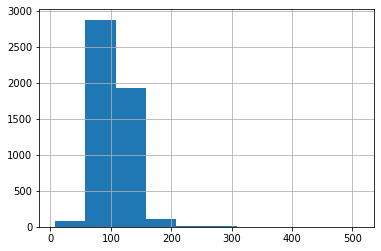

In [126]:
movies_num['duration'].hist() ### no hay muchas anomalia en los datos

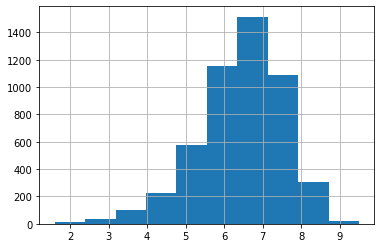

In [127]:
movies_num['imdb_score'].hist() ### no es muy anomalo. tiene una distribucion gausiana bastante normal

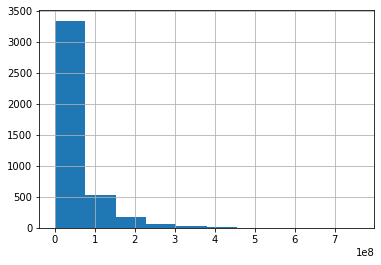

In [128]:
movies_num['gross'].hist() 

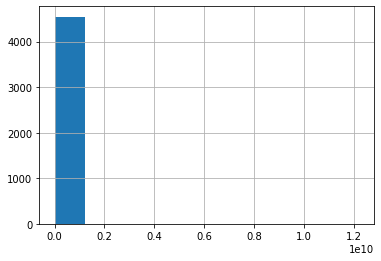

In [129]:
movies_num['budget'].hist() #### aqui hay una anomalia en los datos, no tiene una distribucion gausiana

In [130]:
(movies_num['budget'] >1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [173]:
mask = movies_num['budget']>1e9
movies[mask] 

,movie_title,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


## Recuperar datos perdidos

In [132]:
df = pd.read_csv('https://query.data.world/s/gnpexslsce4wp424w2kg4d6rkyxw2l')
df['movie_title'] = df['movie_title'].apply(lambda x: x.replace('\xa0',''))

In [26]:
from bs4 import BeautifulSoup
import urllib
import re
regex_budget = re.compile(r'.*Budget:</h4>(\s*\S+)')
regex_opening = re.compile(r'.*Opening Weekend USA:</h4>(\s*\S+)')
regex_gross = re.compile(r'.*Gross USA:</h4>(\s*\S+)')
regex_cum_gross = re.compile(r'.*Cumulative Worldwide Gross:</h4>(\s*\S+)')
def scrapper_box_office(url):
    request = urllib.request.Request(url)
    page = urllib.request.urlopen(request)
    dict_ = {'budget':"",'opening':"", 'gross':"", 'cum_gross':""}
    try:
        if page.status == 200:
            soup      = BeautifulSoup(page,'html.parser')
            soup      = str(soup.find('div', {'id':'titleDetails'}))
#             soup      = str(soup.find_all('div',{'class':'txt-block'}))
            budget    = regex_budget.search(soup).group(1)
            opening   = regex_opening.search(soup).group(1)
            gross     = regex_gross.search(soup).group(1)
            cum_gross = regex_cum_gross.search(soup).group(1)
            dict_ = {'budget':budget,'opening':opening, 'gross':gross, 'cum_gross':cum_gross}
    except:
        print(url)
    return dict_

In [27]:
from multiprocessing import Pool #procesamiento paralelo
pool = Pool(40)  
def test(urls):
  list_dict=[]
  for box_office in pool.map(scrapper_box_office,urls):
    list_dict.append(box_office)
  df = pd.DataFrame(list_dict)
  return df 

In [ ]:
import  datetime as dt
start = dt.datetime.now()
# aux = df_['movie_imdb_link'].apply(lambda url : scrapper_box_office(url))
aux = test(df['movie_imdb_link'])
aux.rename(columns={'budget':'production_budget','cum_gross':'worldwide_gross', 'opening':'opening_gross', 'usa_gropss':'usa_gross'}, inplace = True)
end_time = dt.datetime.now()
print(end_time - start)

In [133]:
movies_num = movies[num_cols]
movies_num = pd.concat([movies_num, movies['movie_title']], axis = 1)
movies_num

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,2283,NaN,7.7,NaN,Signed Sealed Delivered
5039,NaN,16.00,43.0,1753,NaN,7.5,NaN,The Following
5040,2013.0,NaN,76.0,0,1400.0,6.3,NaN,A Plague So Pleasant
5041,2012.0,2.35,100.0,2386,NaN,6.3,10443.0,Shanghai Calling


In [257]:
aux_v2 = aux[aux['worldwide_gross']!=''].copy()
movies_v2 = pd.merge(aux_v2, movies_num,left_index=True, right_index=True)
movies_v2

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,"$237,000,000","$77,025,481,","$760,507,625","$2,790,439,000",2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,"$300,000,000","$114,732,820,","$309,420,425","$960,996,492",2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,"$245,000,000","$70,403,148,","$200,074,609","$880,674,609",2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,"$250,000,000","$160,887,295,","$448,139,099","$1,081,124,605",2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
5,"$250,000,000","$30,180,188,","$73,078,100","$284,139,100",2012.0,2.35,132.0,1873,263700000.0,6.6,73058679.0,John Carter
...,...,...,...,...,...,...,...,...,...,...,...,...
5033,"$7,000","$28,162,","$424,760","$545,436",2004.0,1.85,77.0,368,7000.0,7.0,424760.0,Primer
5034,"$7,000","$12,726,","$70,071","$70,071",2005.0,NaN,80.0,0,7000.0,6.3,70071.0,Cavite
5035,"$7,000","$312,528,","$2,040,920","$2,040,920",1992.0,1.37,81.0,147,7000.0,6.9,2040920.0,El Mariachi
5037,"$9,000","$4,584,","$5,000","$5,000",2011.0,NaN,95.0,690,9000.0,6.4,4584.0,Newlyweds


In [258]:
movies_v2['worldwide_gross']

0        $2,790,439,000
1          $960,996,492
2          $880,674,609
3        $1,081,124,605
5          $284,139,100
             ...       
5033           $545,436
5034            $70,071
5035         $2,040,920
5037             $5,000
5042           $262,770
Name: worldwide_gross, Length: 4008, dtype: object

In [259]:
movies_v2['worldwide_gross'] = movies_v2['worldwide_gross'].apply(lambda x : int(re.sub(r'\D+','', x)))
movies_v2['opening_gross'] = movies_v2['opening_gross'].apply(lambda x : int(re.sub(r'\D+','', x)))
movies_v2['usa_gross'] = movies_v2['usa_gross'].apply(lambda x : int(re.sub(r'\D+','', x)))
movies_v2['worldwide_gross']                                                                                                                                                      

0       2790439000
1        960996492
2        880674609
3       1081124605
5        284139100
           ...    
5033        545436
5034         70071
5035       2040920
5037          5000
5042        262770
Name: worldwide_gross, Length: 4008, dtype: int64

In [260]:
movies_v2['production_budget'].apply(lambda x : re.search(r'(\W+|[A-Z]+)\d', x).group(1)).value_counts()

$      3861
GBP      45
EUR      35
CAD      18
FRF       8
INR       6
AUD       5
DEM       5
NOK       4
BRL       3
JPY       3
THB       3
CNY       2
HKD       2
KRW       2
DKK       2
RUR       1
CZK       1
SEK       1
HUF       1
Name: production_budget, dtype: int64

In [261]:
dict_money={
'$'   : 1,
'GBP' : 1.31,
'EUR' : 1.18,
'CAD' : 0.76,
'FRF' : 0.18,
'INR' : 0.013,
'AUD' : 0.72,
'DEM' : 0.6,
'NOK' : 0.11,
'BRL' : 0.18 ,   
'JPY' : 0.0094,     
'THB' : 0.032,
'CNY' : 0.14,   
'HKD' : 0.13,     
'KRW' : 0.00084,      
'DKK' : 0.16,      
'RUR' : 0.014,     
'CZK' : 0.045,     
'SEK' : 0.12,     
'HUF' : 0.0034} 
movies_v2['production_budget'].apply(lambda x : re.search(r'(\W+|[A-Z]+)\d', x).group(1)).map(dict_money).value_counts()

1.00000    3861
1.31000      45
1.18000      35
0.76000      18
0.18000      11
0.01300       6
0.72000       5
0.60000       5
0.11000       4
0.03200       3
0.00940       3
0.16000       2
0.13000       2
0.00084       2
0.14000       2
0.00340       1
0.04500       1
0.01400       1
0.12000       1
Name: production_budget, dtype: int64

In [262]:
movies_v2['production_budget'].apply(lambda x : re.search(r'(\W+|[A-Z]+)\d', x).group(1)).map(dict_money)

0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
5033    1.0
5034    1.0
5035    1.0
5037    1.0
5042    1.0
Name: production_budget, Length: 4008, dtype: float64

In [263]:
movies_v2['production_budget'].apply(lambda x : int(re.sub(r'\D+', '', x)))

0       237000000
1       300000000
2       245000000
3       250000000
5       250000000
          ...    
5033         7000
5034         7000
5035         7000
5037         9000
5042         1100
Name: production_budget, Length: 4008, dtype: int64

In [264]:
movies_v2['production_budget'] = (movies_v2['production_budget'].apply(lambda x : re.search(r'(\W+|[A-Z]+)\d', x).group(1)).map(dict_money)*
                                 movies_v2['production_budget'].apply(lambda x : int(re.sub(r'\D+', '', x))))

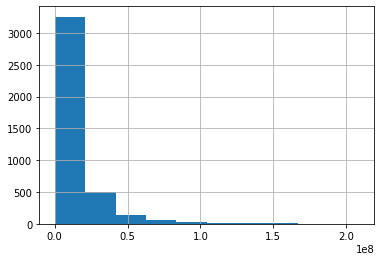

In [265]:
movies_v2['opening_gross'].hist() 

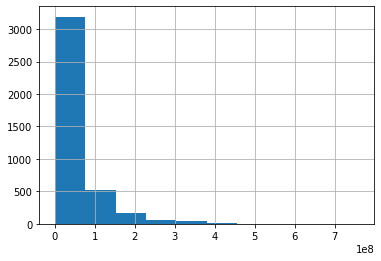

In [266]:
movies_v2['usa_gross'].hist() 

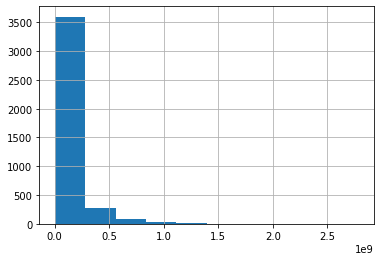

In [267]:
movies_v2['worldwide_gross'].hist() 

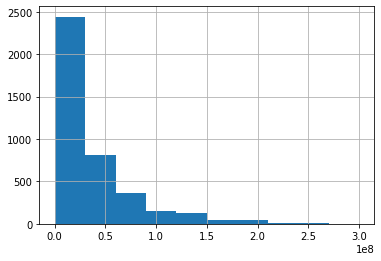

In [268]:
movies_v2['production_budget'].hist()

In [269]:
# index = movies_v2[movies_v2['production_budget'].apply(lambda x : re.search(r'(\W+|[A-Z]+)\d', x).group(1))=='EUR'].index
# index = [2323, 2334, 2988, 3005, 3423, 3859]
# df.loc[index][['country','movie_imdb_link']].head()
# aux.loc[index].head()

## Datos faltantes (nulos o NAN)


In [270]:
### verificar la cantidad de valores perdidos en cada columna
movies_v2.notnull().apply(pd.Series.value_counts)

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
False,NaN,NaN,NaN,NaN,1,98,2,NaN,82,NaN,150,NaN
True,4008.0,4008.0,4008.0,4008.0,4007,3910,4006,4008.0,3926,4008.0,3858,4008.0


In [271]:
### verificar la cantidad de valores nulos en cada columna
(movies_v2 !=0).apply(pd.Series.value_counts)

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN
True,4008.0,4008.0,4008.0,4008.0,4008.0,4008.0,4008.0,3994,4008.0,4008.0,4008.0,4008.0


In [272]:
#### false cuando existe un dato faltante
available = (movies_v2!=0) & (movies_v2.notnull())
available

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5033,True,True,True,True,True,True,True,True,True,True,True,True
5034,True,True,True,True,True,False,True,False,True,True,True,True
5035,True,True,True,True,True,True,True,True,True,True,True,True
5037,True,True,True,True,True,False,True,True,True,True,True,True


In [273]:
#### verificar las lineas con datos faltantes
available.all(axis=1).value_counts()

True     3707
False     301
dtype: int64

In [274]:
#### verificar si la variable objetivo tiene datos faltantes
mask = available['worldwide_gross']
movies_v2 = movies_v2[mask]

In [275]:
### verificar si la variable objetivo tiene valores nulos
((movies_v2!=0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4008
Name: worldwide_gross, dtype: int64

In [276]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [278]:
values = imputer.fit_transform(movies_v2)

In [277]:
movies_v2.drop('movie_title', axis=1,inplace=True)
movies_v2

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,237000000.0,77025481,760507625,2790439000,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,300000000.0,114732820,309420425,960996492,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
2,245000000.0,70403148,200074609,880674609,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
3,250000000.0,160887295,448139099,1081124605,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0
5,250000000.0,30180188,73078100,284139100,2012.0,2.35,132.0,1873,263700000.0,6.6,73058679.0
...,...,...,...,...,...,...,...,...,...,...,...
5033,7000.0,28162,424760,545436,2004.0,1.85,77.0,368,7000.0,7.0,424760.0
5034,7000.0,12726,70071,70071,2005.0,NaN,80.0,0,7000.0,6.3,70071.0
5035,7000.0,312528,2040920,2040920,1992.0,1.37,81.0,147,7000.0,6.9,2040920.0
5037,9000.0,4584,5000,5000,2011.0,NaN,95.0,690,9000.0,6.4,4584.0


In [279]:
values = imputer.fit_transform(movies_v2)

In [280]:
movies_v2.values

array([[2.37000000e+08, 7.70254810e+07, 7.60507625e+08, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.00000000e+08, 1.14732820e+08, 3.09420425e+08, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       [2.45000000e+08, 7.04031480e+07, 2.00074609e+08, ...,
        2.45000000e+08, 6.80000000e+00, 2.00074175e+08],
       ...,
       [7.00000000e+03, 3.12528000e+05, 2.04092000e+06, ...,
        7.00000000e+03, 6.90000000e+00, 2.04092000e+06],
       [9.00000000e+03, 4.58400000e+03, 5.00000000e+03, ...,
        9.00000000e+03, 6.40000000e+00, 4.58400000e+03],
       [1.10000000e+03, 8.52230000e+04, 1.81041000e+05, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [281]:
values

array([[2.37000000e+08, 7.70254810e+07, 7.60507625e+08, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.00000000e+08, 1.14732820e+08, 3.09420425e+08, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       [2.45000000e+08, 7.04031480e+07, 2.00074609e+08, ...,
        2.45000000e+08, 6.80000000e+00, 2.00074175e+08],
       ...,
       [7.00000000e+03, 3.12528000e+05, 2.04092000e+06, ...,
        7.00000000e+03, 6.90000000e+00, 2.04092000e+06],
       [9.00000000e+03, 4.58400000e+03, 5.00000000e+03, ...,
        9.00000000e+03, 6.40000000e+00, 4.58400000e+03],
       [1.10000000e+03, 8.52230000e+04, 1.81041000e+05, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [282]:
x = pd.DataFrame(values)
x.columns = movies_v2.columns
x.index = movies_v2.index
x

,production_budget,opening_gross,usa_gross,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,237000000.0,77025481.0,760507625.0,2.790439e+09,2009.0,1.780000,178.0,4834.0,237000000.0,7.9,760505847.0
1,300000000.0,114732820.0,309420425.0,9.609965e+08,2007.0,2.350000,169.0,48350.0,300000000.0,7.1,309404152.0
2,245000000.0,70403148.0,200074609.0,8.806746e+08,2015.0,2.350000,148.0,11700.0,245000000.0,6.8,200074175.0
3,250000000.0,160887295.0,448139099.0,1.081125e+09,2012.0,2.350000,164.0,106759.0,250000000.0,8.5,448130642.0
5,250000000.0,30180188.0,73078100.0,2.841391e+08,2012.0,2.350000,132.0,1873.0,263700000.0,6.6,73058679.0
...,...,...,...,...,...,...,...,...,...,...,...
5033,7000.0,28162.0,424760.0,5.454360e+05,2004.0,1.850000,77.0,368.0,7000.0,7.0,424760.0
5034,7000.0,12726.0,70071.0,7.007100e+04,2005.0,2.110934,80.0,0.0,7000.0,6.3,70071.0
5035,7000.0,312528.0,2040920.0,2.040920e+06,1992.0,1.370000,81.0,147.0,7000.0,6.9,2040920.0
5037,9000.0,4584.0,5000.0,5.000000e+03,2011.0,2.110934,95.0,690.0,9000.0,6.4,4584.0


In [284]:
x.to_csv('df_intermediate.csv', index = False)

In [17]:
movie_ojbs = movies[obj_cols].loc[x.index]
movie_ojbs.to_csv('movies_objs.csv', index = False)